In [1]:
# Dependencies
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
# Get df from extracted csv
df = pd.read_csv("reddit_wsb.csv")
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Recruiting: retards with good DD skills to go ...,1,s9i9bw,https://www.reddit.com/r/wallstreetbets/commen...,0,1.642792e+09,"Hello ladies and gentlemen,\n\nYou may have se...",2022-01-21 11:07:47
1,Bearish on Tesla earnings?,3,s9i754,https://www.reddit.com/gallery/s9i754,5,1.642792e+09,NaN,2022-01-21 11:04:56
2,$AMRS Stock,1,s9i6tw,https://www.reddit.com/r/wallstreetbets/commen...,0,1.642792e+09,"Hello guys, how are:)\n\nWhat you think about ...",2022-01-21 11:04:30
3,& Now A Live Look At The Tendie Man Negotiatin...,1,s9i62o,https://v.redd.it/mma4fm5x93d81,0,1.642792e+09,NaN,2022-01-21 11:03:32
4,Endgame,3,s9i6cs,https://i.redd.it/pm1rr0f1a3d81.jpg,1,1.642792e+09,NaN,2022-01-21 11:03:54


In [3]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1892 non-null   object 
 1   score      1892 non-null   int64  
 2   id         1892 non-null   object 
 3   url        913 non-null    object 
 4   comms_num  1892 non-null   int64  
 5   created    1892 non-null   float64
 6   body       1258 non-null   object 
 7   timestamp  1892 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 118.4+ KB


In [4]:
# check nulls
df.isna().sum()

title          0
score          0
id             0
url          979
comms_num      0
created        0
body         634
timestamp      0
dtype: int64

In [5]:
# remove nulls in body
df = df.dropna(subset=['body'])
df.isna().sum()

title          0
score          0
id             0
url          979
comms_num      0
created        0
body           0
timestamp      0
dtype: int64

In [6]:
# Visualize Impact Scores
fig = px.histogram(df, x="score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Impact Score')
fig.show()

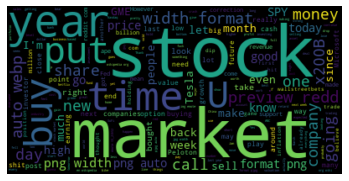

In [7]:
# Create a wordcloud for body
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Create stopword list:
stopwords = set(stopwords.words('english'))
new_stopwords = ['like','https','WWW','also','could','still','thing','say','see','said','well','want','would','think','get']
stopwords.update(new_stopwords)

# remove stop words from body
text = " ".join(review for review in df.body)

# graph wordcloud
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.show()